In [1]:
from pymongo import MongoClient
from pprint import pprint

import pandas as pd
import re
import nltk

import pickle
import json

In [2]:
from bson.objectid import ObjectId

In [3]:
# stemming
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/Jocelyn/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
# import product list
with open('pickles/product_list.pickle', 'rb') as to_read:
    product_list = pickle.load(to_read)

with open('pickles/review_list.pickle', 'rb') as to_read:
    review_list = pickle.load(to_read)
    
with open('pickles/sim_asin.pickle', 'rb') as to_read:
    sim_asin = pickle.load(to_read)
    
with open('pickles/doc_topic.pickle', 'rb') as to_read:
    doc_topic = pickle.load(to_read)

In [6]:
doc_topic.head(5)

,0,1,2,3,4,5,6,7,8,9
asin,,,,,,,,,,
B0000Y3NO6,0.05427,0.00904,0.00433,0.02289,0.10064,0.03511,0.04922,0.06427,0.00000,0.00097
B00012C5RS,0.05172,0.01705,0.00866,0.01602,0.04922,0.01919,0.12587,0.00586,0.00748,0.01431
B0001EKTTC,0.04839,0.02002,0.04258,0.07218,0.10511,0.00331,0.00418,0.00000,0.01376,0.00000
B0001EL5Q8,0.07574,0.00000,0.00000,0.08743,0.01846,0.00526,0.08463,0.01515,0.01931,0.00000
B0001EL5JA,0.03347,0.00424,0.00000,0.06206,0.03392,0.10670,0.02497,0.00439,0.00000,0.00969


In [15]:
for i in range(0,10):
    print(min(doc_topic[i]),max(doc_topic[i]))

0.0 0.20975
0.0 0.22641
0.0 0.30752
0.0 0.13026
0.0 0.23446
0.0 0.16811
0.0 0.19901
0.0 0.18633
0.0 0.21343
0.0 0.31562


In [16]:
#PCA to reduce to 2 dimensions
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(doc_topic)
pcafeatures_train = pca.transform(doc_topic)

In [18]:
import matplotlib.pyplot as plt

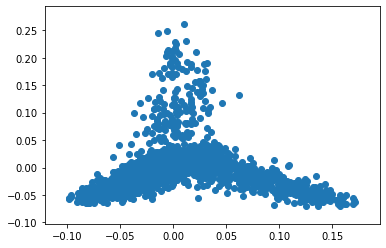

In [27]:
plt.scatter(pcafeatures_train[:,0],pcafeatures_train[:,1]);